#Homework Week 11 NLP Part 5: RAG

Poet: William Blake

##Team - PlaceHolder
1. Ujwala Mote
2. Suma Nagral
3. Nihal Kaul
4. Chinmayi Sunku



#Install required packages

In [ ]:
!pip install -q transformers peft accelerate bitsandbytes safetensors sentencepiece streamlit weaviate-client cohere openai langchain sentence-transformers tiktoken youtube-transcript-api jq textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 44.9 MB/s et

In [ ]:
!pip install sklearn pyLDAvis

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install --upgrade setuptools pip numpy pyLDAvis contractions sentence-transformers smart_open

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 16.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Attempting uninstall: numpy
    F

Restart runtime to get the upgraded libraries

#Importing dependencies

In [ ]:
# fixing unicode error in google colab
import locale

locale.getpreferredencoding = lambda: "UTF-8"

# import dependencies
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    pipeline,
)
from langchain.text_splitter import TokenTextSplitter
from langchain.llms import HuggingFacePipeline
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.vectorstores import Weaviate
import weaviate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(required_tensorflow_version)):


#Weaviate Setup

In [ ]:
WEAVIATE_URL = "https://placeholders-rag-assignment-5qo9jqe4.weaviate.network"
WEAVIATE_API_KEY = "F14WZeAn2UBtxfgZ1kA75zvTvlOUnXz8YxKU"

client = weaviate.Client(
    url=WEAVIATE_URL, auth_client_secret=weaviate.AuthApiKey(WEAVIATE_API_KEY)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


specify embedding model (using huggingface sentence transformer)

In [ ]:
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
    model_name=embedding_model_name, model_kwargs=model_kwargs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

#Ingest Poems and Articles into the vector DB (weaviate)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
poems_file_path = "/content/drive/MyDrive/data/William_Blake.jsonl"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from langchain.document_loaders import JSONLoader

loader = JSONLoader(
    file_path=poems_file_path,
    jq_schema='.Poem',
    text_content=False,
    json_lines=True)

data = loader.load()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text_splitter = TokenTextSplitter(chunk_size=128, chunk_overlap=0)
split_docs = text_splitter.split_documents(data)

vector_db = Weaviate.from_documents(
    split_docs, embeddings, client=client, by_text=False
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ingesting Articles

In [ ]:
articles_file_path = "/content/drive/MyDrive/data/articles.jsonl"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from langchain.document_loaders import JSONLoader

loader = JSONLoader(
    file_path=articles_file_path,
    jq_schema='.content',
    text_content=False,
    json_lines=True)

data = loader.load()
text_splitter = TokenTextSplitter(chunk_size=128, chunk_overlap=0)
split_docs = text_splitter.split_documents(data)

vector_db = Weaviate.from_documents(
    split_docs, embeddings, client=client, by_text=False
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


You can test the vector retriever using the following code:



In [ ]:
vector_db.similarity_search("List the events", k=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Document(page_content=' Observer newspaper in a bitterly ironic reference to the bloody Battle of Waterloo which had taken place four years earlier. August meeting Historian Robert Poole has called the Peterloo Massacre "the bloodiest political event of the 19th century in English soil", and "a political earthquake in the northern powerhouse of the industrial revolution". The London and national papers shared the horror felt in the Manchester region, but Peterloo\'s immediate effect was to cause the government to pass the Six Acts, which were aimed at suppressing any meetings for the purpose of radical reform. It also led indirectly to the foundation of the Manchester Guardian newspaper. In a survey conducted by The Guardian', metadata={'seq_num': 43, 'source': '/content/drive/MyDrive/data/articles.jsonl'}),
 Document(page_content="The Great Exhibition of the Works of Industry of All Nations, also known as the Great Exhibition or the Crystal Palace Exhibition (in reference to the temp

#Setting up a local LLM
This part of the code was completely copied from the example provided by the AI Geek. It loads the `zephyr-7b-alpha-sharded` model and its tokenizer from HuggingFace and loads it as a LangChain LLM module.

In [ ]:
# specify model huggingface mode name
model_name = "anakin87/zephyr-7b-alpha-sharded"

# function for loading 4-bit quantized model
def load_quantized_model(model_name: str):
    """
    :param model_name: Name or path of the model to be loaded.
    :return: Loaded quantized model.
    """
    bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_use_double_quant=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
    )

    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        load_in_4bit=True,
        torch_dtype=torch.bfloat16,
        quantization_config=bnb_config,
    )
    return model

# function for initializing tokenizer
def initialize_tokenizer(model_name: str):
    """
    Initialize the tokenizer with the specified model_name.

    :param model_name: Name or path of the model for tokenizer initialization.
    :return: Initialized tokenizer.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name, return_token_type_ids=False)
    tokenizer.bos_token_id = 1  # Set beginning of sentence token id
    return tokenizer

# initialize tokenizer
tokenizer = initialize_tokenizer(model_name)
# load model
model = load_quantized_model(model_name)
# specify stop token ids
stop_token_ids = [0]

# build huggingface pipeline for using zephyr-7b-alpha
pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    use_cache=True,
    device_map="auto",
    max_length=2048,
    do_sample=True,
    top_k=5,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

# specify the llm
llm = HuggingFacePipeline(pipeline=pipeline)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tokenizer_config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

#Conversation Chain

##Without RAG: Using model directly

In [ ]:
eval_prompt = "can you list some major events happend in US or London during William Blake's lifetime?"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


can you list some major events happend in US or London during William Blake's lifetime?
Generate according to: William Blake (1757-1827) was an English poet, painter and printmaker. Largely unrecognized during his lifetime, Blake is now considered a seminal figure in the history of both the poetry and visual arts of the Romantic Age. His work has been said to have greatly influenced later poets such as Walt Whitman, Emily Dickinson, T.S. Eliot, Ezra Pound and Allen Ginsberg, among many others.
Blake’s most famous collection of poems, Songs of Innocence and Experience, was published in 1794. The poems are accompanied by illustrations that he produced using a technique called relief etching. This process involves cutting away everything except what will be printed, leaving behind a raised surface on which ink can be applied.
The poem “The Chimney Sweeper” from Songs of Experience is one of Blake’s best known works


In [ ]:
eval_prompt = "How is William Blake's 'Songs of Innocence and of Experience' related to the 'The Slave Trade' ?"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


How is William Blake's 'Songs of Innocence and of Experience' related to the 'The Slave Trade' ?

In what ways does Blake's poetry challenge traditional religious beliefs?

How do Blake's poems in 'Songs of Innocence and of Experience' reflect his views on childhood, innocence, experience, and religion?

What are some examples from 'Songs of Innocence and of Experience' that illustrate Blake's critique of organized religion and its impact on society?

How does Blake use language and imagery in 'Songs of Innocence and of Experience' to convey his message about the corruption of innocence and the loss of spirituality in modern society?


##With RAG

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db.as_retriever()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
response = qa_chain.run("can you list some major events happend in US or London during William Blake's lifetime?")
print(response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 During William Blake's lifetime, major events that happened in both the US and London were:

- American Revolution and eventual independence (1775-1783)
- French Revolution and subsequent Reign of Terror (1789-1799)
- Industrial Revolution, which transformed manufacturing and society in both countries
- The Napoleonic Wars (1803-1815) that led to the rise of nationalism in Europe and the US
- The publication and popularity of the works of William Wordsworth, Samuel Taylor Coleridge, and John Keats in the Romantic movement, which also influenced Blake's later reception.

In addition, Blake lived during significant political and social upheavals in his own country, including the Gordon Riots (1780) and the French invasion (1793-1795).

However, these events did not necessarily directly influence Blake's art and ideas, as he was known for his unique vision and philosophy that often diverged from the mainstream.


In [ ]:
response = qa_chain.run("How is William Blake's 'Songs of Innocence and of Experience' related to the 'The Slave Trade' ?")
print(response)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 'Songs of Innocence and of Experience' by William Blake includes the poem "The Little Black Boy," which presents a black boy narrating a message about the fundamental equality of all people to his white compatriot. The poem can be related to the 'The Slave Trade' through its message that all people are equal, which is relevant to the abolition of slavery. The article also notes that Blake's 1787 poem "The Little Black Boy" coincided with an abolition campaign, and that Blake's reasoning, which draws not from pragmatism, but poetry, can still offer some use today in constructing a vigorous denunciation of both slavery and racism. However, the article does not directly connect "The Little Black Boy" or Blake's poetry to specific editorial debates or discussions around 'The Slave Trade.'


#Comparison with and without RAG

Answers without RAG:
1. can you list some major events happend in US or London during William Blake's lifetime?

```
Generate according to: William Blake (1757-1827) was an English poet, painter and printmaker. Largely unrecognized during his lifetime, Blake is now considered a seminal figure in the history of both the poetry and visual arts of the Romantic Age. His work has been said to have greatly influenced later poets such as Walt Whitman, Emily Dickinson, T.S. Eliot, Ezra Pound and Allen Ginsberg, among many others.
Blake’s most famous collection of poems, Songs of Innocence and Experience, was published in 1794. The poems are accompanied by illustrations that he produced using a technique called relief etching. This process involves cutting away everything except what will be printed, leaving behind a raised surface on which ink can be applied.
The poem “The Chimney Sweeper” from Songs of Experience is one of Blake’s best known works
```

2. How is William Blake's 'Songs of Innocence and of Experience' related to the 'The Slave Trade' ?

```
In what ways does Blake's poetry challenge traditional religious beliefs?

How do Blake's poems in 'Songs of Innocence and of Experience' reflect his views on childhood, innocence, experience, and religion?

What are some examples from 'Songs of Innocence and of Experience' that illustrate Blake's critique of organized religion and its impact on society?

How does Blake use language and imagery in 'Songs of Innocence and of Experience' to convey his message about the corruption of innocence and the loss of spirituality in modern society?
```

Answers with RAG:
1. can you list some major events happend in US or London during William Blake's lifetime?

```
During William Blake's lifetime, major events that happened in both the US and London were:

- American Revolution and eventual independence (1775-1783)
- French Revolution and subsequent Reign of Terror (1789-1799)
- Industrial Revolution, which transformed manufacturing and society in both countries
- The Napoleonic Wars (1803-1815) that led to the rise of nationalism in Europe and the US
- The publication and popularity of the works of William Wordsworth, Samuel Taylor Coleridge, and John Keats in the Romantic movement, which also influenced Blake's later reception.

In addition, Blake lived during significant political and social upheavals in his own country, including the Gordon Riots (1780) and the French invasion (1793-1795).

However, these events did not necessarily directly influence Blake's art and ideas, as he was known for his unique vision and philosophy that often diverged from the mainstream.


```

2.How is William Blake's 'Songs of Innocence and of Experience' related to the 'The Slave Trade' ?

```
 'Songs of Innocence and of Experience' by William Blake includes the poem "The Little Black Boy," which presents a black boy narrating a message about the fundamental equality of all people to his white compatriot. The poem can be related to the 'The Slave Trade' through its message that all people are equal, which is relevant to the abolition of slavery. The article also notes that Blake's 1787 poem "The Little Black Boy" coincided with an abolition campaign, and that Blake's reasoning, which draws not from pragmatism, but poetry, can still offer some use today in constructing a vigorous denunciation of both slavery and racism. However, the article does not directly connect "The Little Black Boy" or Blake's poetry to specific editorial debates or discussions around 'The Slave Trade.'


```








After comparing the answers to the above 2 questions:
- for the first question related to events, the model gave an answer related to what happend in his life, while RAG focused more on events in US or London.
- The answers provided without RAG gives a broader exploration of Blake's themes, steering away from the specific question. While the answer with RAG aligns well and precicely to the point.


#Conclusion

- We scrapped William Blake's 30 poems and stored it in a jsonl file.
- To scrape articles related to eventes that took place during his lifetime in both US and London(his place of birth) we used Bard.
  - prompt to the bot:


```
what were the major world events and those in the united states or London that occured duirng the life of William Blake the poet?
```

Response:


```
William Blake, a renowned English poet, painter, and printmaker, lived through a period of significant historical events that shaped his worldview and influenced his artistic expression. His lifetime spanned from 1757 to 1827, a period marked by political revolutions, social upheavals, and intellectual transformations.

Major World Events

American Revolution (1775-1783): Blake's early years coincided with the American Revolution, which he saw as a symbolic struggle for freedom and individual liberty. This event left a profound impression on his political and philosophical views, which are reflected in his prophetic works like "America: A Prophecy."

French Revolution (1789-1799): The French Revolution ignited Blake's enthusiasm for radical social and political change. He initially embraced the revolution as a symbol of overthrowing oppressive systems and establishing a more equitable society. However, his disillusionment with the revolution's violent excesses is evident in his later works, such as "The Marriage of Heaven and Hell."

Napoleonic Wars (1792-1815): The Napoleonic Wars dominated Europe during Blake's middle years. These conflicts had a significant impact on Britain, both domestically and internationally. Blake's response to the wars was complex, as he recognized the need to defend against Napoleon's expansionist ambitions while also critiquing the militaristic and oppressive nature of war itself.

Events in the United States

War of 1812 (1812-1814): The War of 1812 between the United States and Great Britain occurred during Blake's later years. This conflict had a direct impact on British society and economy, and Blake's writings from this period reflect his concerns about the war's impact on individual liberty and social stability.

Rise of Democracy: The United States during Blake's lifetime witnessed the expansion of democratic ideals and the gradual dismantling of traditional hierarchies. This transformation resonated with Blake's own belief in personal freedom and the power of imagination, and it is evident in his writings that emphasize individual expression and the rejection of oppressive structures.

Events in London

Industrial Revolution: London, as the heart of the British Empire, was at the forefront of the Industrial Revolution, which brought about rapid urbanization, social and economic changes, and new technologies. Blake's writings often reflect the anxieties and contradictions of this period, as he grappled with the impact of industrialization on human relationships, the environment, and the human spirit.

Rise of Dissent and Radicalism: London was a hotbed of political and social dissent during Blake's time. Radical thinkers and activists challenged traditional norms and advocated for social justice. Blake, though not directly involved in political activism, shared many of the views of these radicals, and his writings often reflect a critique of authority, social inequality, and the suppression of individual expression.

In conclusion, William Blake's life coincided with a period of significant historical events that shaped his artistic vision and philosophical perspectives. His writings, imbued with symbolism and visionary imagery, reflect his engagement with the political, social, and intellectual currents of his time. His legacy as a poet, painter, and printmaker continues to inspire and challenge readers and artists alike.
```

- We searched these events and got wiki articles for each of them and scrapped more than 30 articles and stored it in jsonl.

(all the jsonl's can be found [here](https://drive.google.com/drive/folders/1hkaF4wF6c5Lbc8NcmPbkXRvlJoz9lWYf?usp=sharing).)

- We then stored then setup weaviate and loaded the poems and articles into the ventor DB.
- Setup LLM locally
- Tested the conversation bot by directly prompting the LLM first and then by using RAG (i.e., data from our DB and LLM)
- compared the two results and wrote conclusions.



#Knowledge Graph

In [ ]:
import pandas as pd
import spacy
import textacy
import matplotlib.pylab as plt
import networkx as nx
import json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##KG for Poem

###Load the poem

In [ ]:
articles_file_path = "/content/drive/MyDrive/data/William_Blake.csv"
df_articles = pd.read_csv(articles_file_path)
poem = df_articles.iloc[9]['Poem_for_Human']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Load the spacy ‘en_core_web_s’ english pipeline and process the plain-text

In [ ]:
# Load spacy model
nlp = spacy.load('en_core_web_sm')
# Plain text
text = poem
# Process plain text with spacy
doc = nlp(text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###extract Subject Object Verb (SVO) triples from spacy object

In [ ]:
# Extract SVO list from spacy object
triples = list(textacy.extract.subject_verb_object_triples(doc))
print(triples)

[SVOTriple(subject=[I], verb=[love], object=[to, rise, in, a, summer, morn]), SVOTriple(subject=[it], verb=[drives], object=[joy]), SVOTriple(subject=[ones], verb=[spend], object=[day]), SVOTriple(subject=[I], verb=[drooping], object=[sit]), SVOTriple(subject=[I], verb=[spend], object=[hour]), SVOTriple(subject=[I], verb=[can, take], object=[sit, hour]), SVOTriple(subject=[what, griefs, destroyOr], verb=[bless], object=[year])]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Generate node list and relations

In [ ]:
nodes = []
relations = []
# iterate over the triples
for triple in triples:
    # extract the Subject and Object from triple
    node_subject = "_".join(map(str, triple.subject))
    node_object  = "_".join(map(str, triple.object))
    nodes.append(node_subject)
    nodes.append(node_object)
    # extract the relation between S and O
    # add the attribute 'action' to the relation
    relation = "_".join(map(str, triple.verb))
    relations.append((node_subject,node_object,{'action':relation}))
# remove duplicate nodes
nodes = list(set(nodes))
print(nodes)
# ['to_extract_SVO', 'I']
print(relations)
# [('I', 'to_extract_SVO', {'action': 'am_going'})]

['sit', 'sit_hour', 'what_griefs_destroyOr', 'joy', 'hour', 'I', 'day', 'year', 'it', 'to_rise_in_a_summer_morn', 'ones']
[('I', 'to_rise_in_a_summer_morn', {'action': 'love'}), ('it', 'joy', {'action': 'drives'}), ('ones', 'day', {'action': 'spend'}), ('I', 'sit', {'action': 'drooping'}), ('I', 'hour', {'action': 'spend'}), ('I', 'sit_hour', {'action': 'can_take'}), ('what_griefs_destroyOr', 'year', {'action': 'bless'})]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Plot the graph

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(relations)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


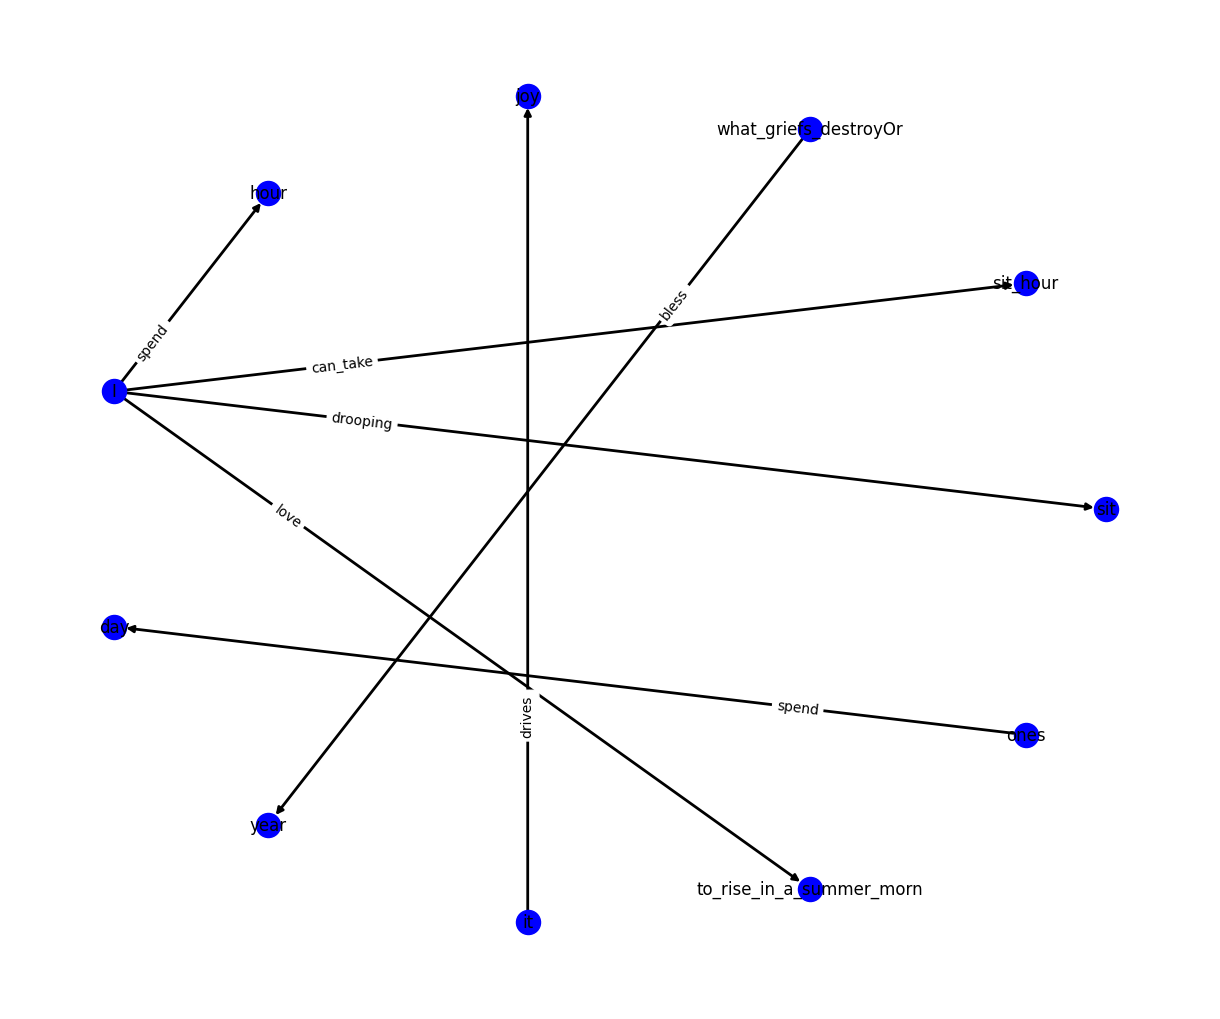

In [ ]:
# extract the attribute 'action' from edges
edge_attribute = nx.get_edge_attributes(G, 'action')
edges, weights = zip(*edge_attribute.items())
# resize figure
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
# set figure layout
pos = nx.circular_layout(G)
# draw graph
nx.draw(G, pos, node_color='b', width=2, with_labels=True)
# draw edge attributes
nx.draw_networkx_edge_labels(G, pos,edge_attribute, label_pos=0.75 )
plt.show()

##KG for Article

In [ ]:
article = "/content/drive/MyDrive/data/articles.jsonl"

# Read JSONL file line by line, parse each line, and append to a list
data = []
with open(article, 'r') as file:
    for line in file:
        json_object = json.loads(line)
        data.append(json_object)

# Create DataFrame from the list
df = pd.DataFrame(data)
articleA = df.iloc[31]['content']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load spacy model
nlp = spacy.load('en_core_web_sm')
# Plain text
text = articleA
# Process plain text with spacy
doc = nlp(text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Extract SVO list from spacy object
triples = list(textacy.extract.subject_verb_object_triples(doc))
print(triples)

[SVOTriple(subject=[Inclosure, Acts], verb=[created], object=[property, rights]), SVOTriple(subject=[rights], verb=[were, held], object=[properties, tenants]), SVOTriple(subject=[Waste], verb=[was, not, used], object=[anyone]), SVOTriple(subject=[Waste], verb=[was, farmed], object=[peasants]), SVOTriple(subject=[it], verb=[was, administered], object=[courts]), SVOTriple(subject=[which], verb=[exercised], object=[control]), SVOTriple(subject=[peasants], verb=[were, allowed], object=[to, live, on, the, strips, owned, by, the, lord, in, return, for, cultivating, his, land]), SVOTriple(subject=[system], verb=[facilitated], object=[crop, rotation]), SVOTriple(subject=[individual], verb=[might, possess], object=[strips]), SVOTriple(subject=[tenants, copyholders], verb=[had], object=[rights]), SVOTriple(subject=[it], verb=[enabled], object=[landlords]), SVOTriple(subject=[Notes, productivity], verb=[enabled], object=[landowners]), SVOTriple(subject=[people], verb=[working], object=[land]), SV

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nodes = []
relations = []
# iterate over the triples
for triple in triples:
    # extract the Subject and Object from triple
    node_subject = "_".join(map(str, triple.subject))
    node_object  = "_".join(map(str, triple.object))
    nodes.append(node_subject)
    nodes.append(node_object)
    # extract the relation between S and O
    # add the attribute 'action' to the relation
    relation = "_".join(map(str, triple.verb))
    relations.append((node_subject,node_object,{'action':relation}))
# remove duplicate nodes
nodes = list(set(nodes))
print(nodes)
# ['to_extract_SVO', 'I']
print(relations)
# [('I', 'to_extract_SVO', {'action': 'am_going'})]

['Waste', 'countryside', 'numbers', 'anyone', 'landlords', 'properties_tenants', '‚_Äì', 'solicitors_surveyors_commissioners', 'Inclosure_Acts', 'courts', 'place', 'property_rights', 'tenants', 'meetings', 'control', 'appointment', 'land', 'concentration', 'people', 'rights', 'advances', 'system', 'This', 'landowners', 'which', 'crop_rotation', 'Notes_productivity', 'peasants', 'tenants_copyholders', 'strips', 'who', 'individual', 'powers', 'to_live_on_the_strips_owned_by_the_lord_in_return_for_cultivating_his_land', 'it', 'Inclosure_Act']
[('Inclosure_Acts', 'property_rights', {'action': 'created'}), ('rights', 'properties_tenants', {'action': 'were_held'}), ('Waste', 'anyone', {'action': 'was_not_used'}), ('Waste', 'peasants', {'action': 'was_farmed'}), ('it', 'courts', {'action': 'was_administered'}), ('which', 'control', {'action': 'exercised'}), ('peasants', 'to_live_on_the_strips_owned_by_the_lord_in_return_for_cultivating_his_land', {'action': 'were_allowed'}), ('system', 'crop_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(relations)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


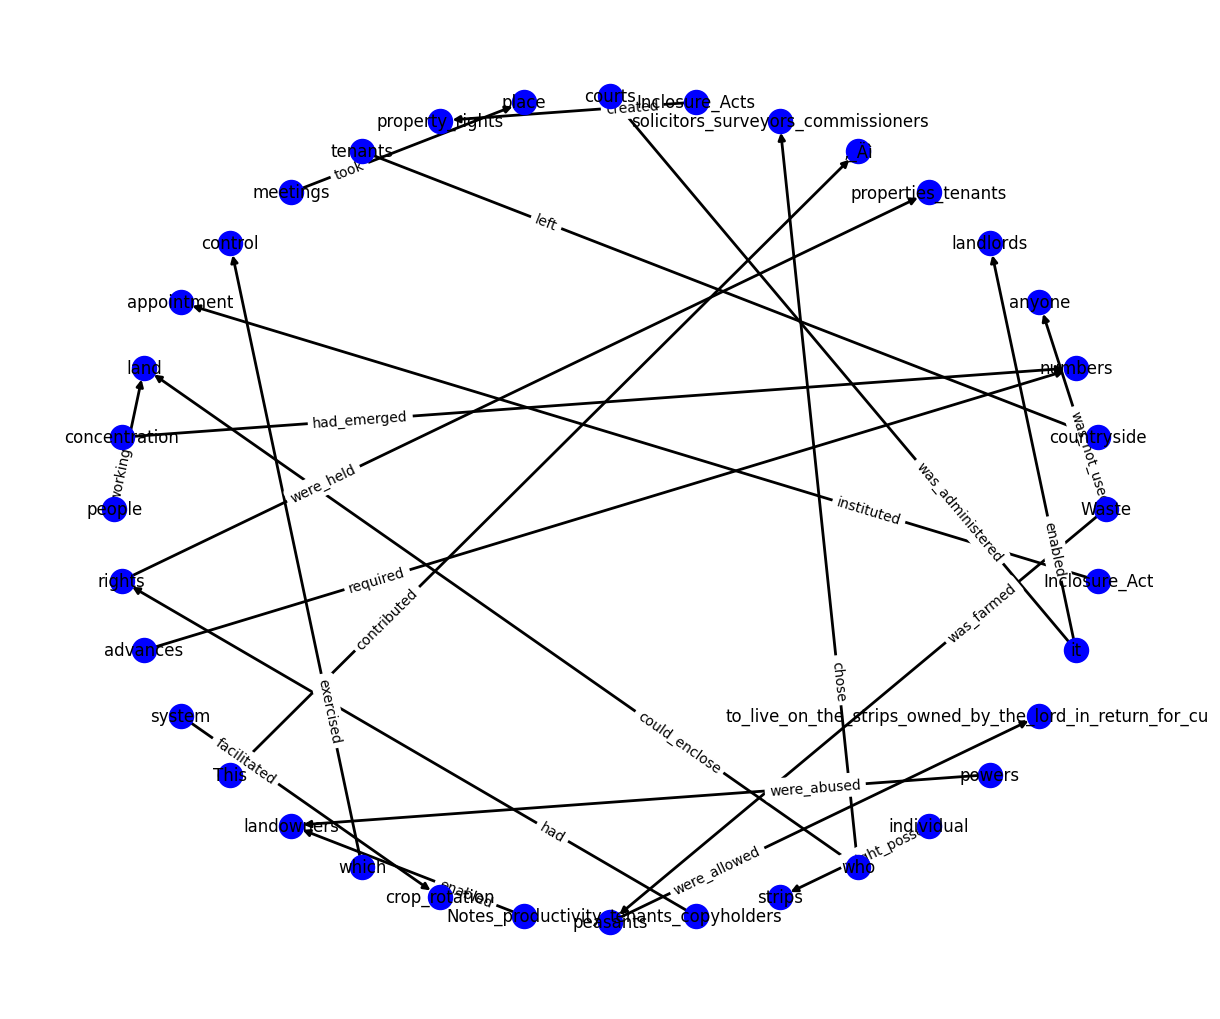

In [ ]:
# extract the attribute 'action' from edges
edge_attribute = nx.get_edge_attributes(G, 'action')
edges, weights = zip(*edge_attribute.items())
# resize figure
plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = True
# set figure layout
pos = nx.circular_layout(G)
# draw graph
nx.draw(G, pos, node_color='b', width=2, with_labels=True)
# draw edge attributes
nx.draw_networkx_edge_labels(G, pos,edge_attribute, label_pos=0.75 )
plt.show()

##Topic Modeling

In [ ]:
import spacy
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt

# Assuming 'articleA' is your text data
nlp = spacy.load("en_core_web_sm")
doc = nlp(articleA)

# Tokenization and removing stop words and punctuations
words = [token.text for token in doc if token.is_alpha and not token.is_stop]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary([words])

# Create a corpus (bag of words) for the LDA model
corpus = [dictionary.doc2bow(words)]

# Build the LDA model with, for example, 5 topics
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Visualize topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# If you want to print the top words for each topic
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

plt.show()  # Ensure the plot is displayed


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.005*"land" + 0.005*"tenants" + 0.005*"acts" + 0.005*"Inclosure"')
(1, '0.005*"land" + 0.005*"tenants" + 0.005*"acts" + 0.005*"lord"')
(2, '0.005*"land" + 0.005*"landowners" + 0.005*"tenants" + 0.005*"acts"')
(3, '0.041*"land" + 0.021*"tenants" + 0.015*"Inclosure" + 0.015*"acts"')
(4, '0.005*"land" + 0.005*"tenants" + 0.005*"common" + 0.005*"Inclosure"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


Total SVO triples: 22
Triples for Topic 0: 10


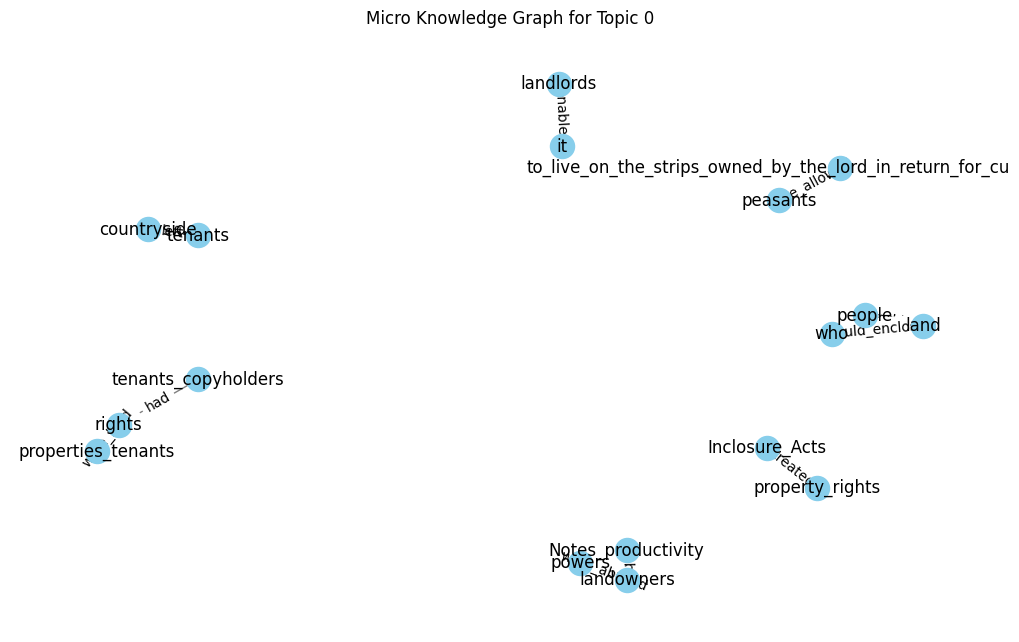

Triples for Topic 1: 10


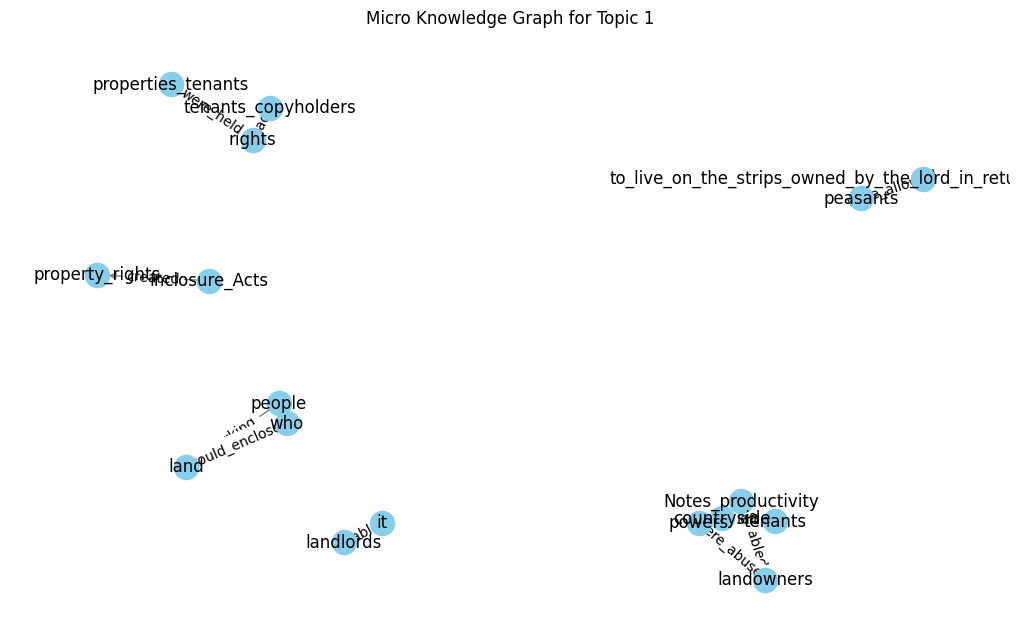

Triples for Topic 2: 10


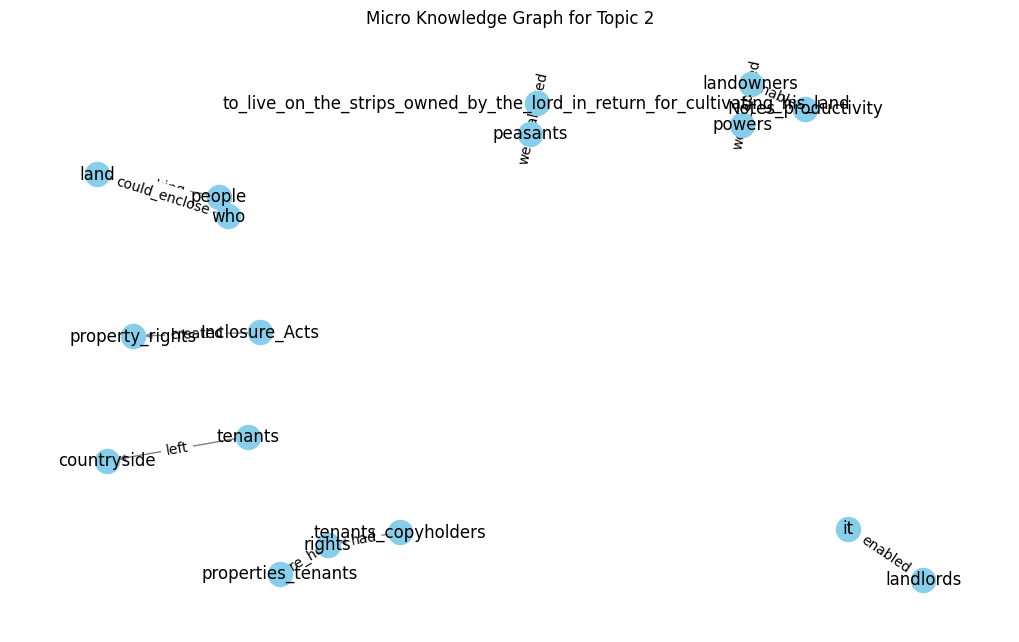

Triples for Topic 3: 10


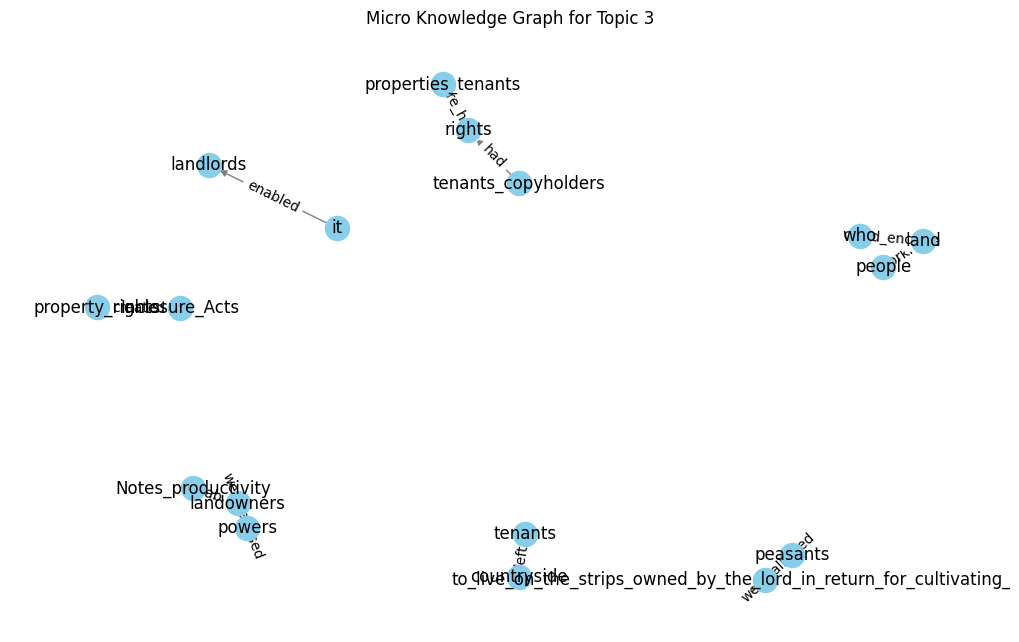

Triples for Topic 4: 9


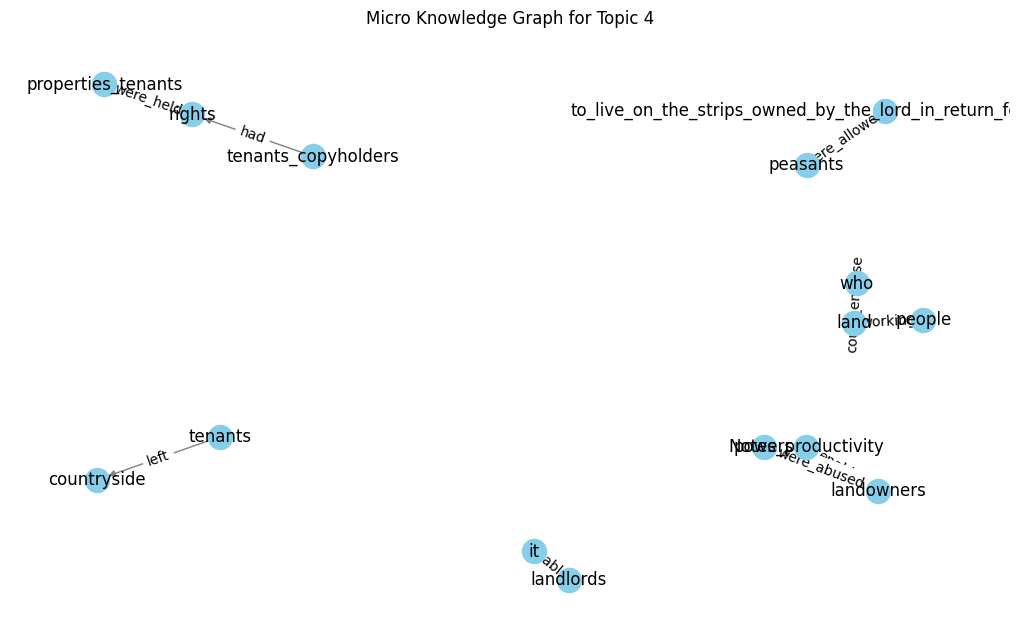

In [ ]:
# Extract SVO triples
triples = list(textacy.extract.subject_verb_object_triples(doc))
print("Total SVO triples:", len(triples))

# Define key terms for each topic based on your LDA output
topic_keywords = {
    "Topic 0": ["land", "tenants", "acts", "Inclosure"],
    "Topic 1": ["land", "tenants", "acts", "lord"],
    "Topic 2": ["land", "landowners", "tenants", "acts"],
    "Topic 3": ["land", "tenants", "Inclosure", "acts"],
    "Topic 4": ["land", "tenants", "common", "Inclosure"]
}

# Function to filter triples by keywords
def filter_triples_by_keywords(triples, keywords):
    filtered_triples = []
    for triple in triples:
        triple_text = " ".join(map(str, [triple.subject, triple.verb, triple.object])).lower()
        if any(keyword in triple_text for keyword in keywords):
            filtered_triples.append(triple)
    return filtered_triples

# Create micro knowledge graphs for each topic
for topic, keywords in topic_keywords.items():
    topic_triples = filter_triples_by_keywords(triples, keywords)
    print(f"Triples for {topic}: {len(topic_triples)}")

    G = nx.DiGraph()

    for triple in topic_triples:
        subject = "_".join(map(str, triple.subject))
        obj = "_".join(map(str, triple.object))
        action = "_".join(map(str, triple.verb))
        G.add_edge(subject, obj, label=action)

    if len(G.nodes) > 0:
        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.title(f"Micro Knowledge Graph for {topic}")
        plt.show()
    else:
        print(f"No data to display for {topic}")


##Transitive Closure for KGs

In [ ]:
nlp = spacy.load('en_core_web_sm')

def build_graph(text):
    doc = nlp(text)
    triples = list(textacy.extract.subject_verb_object_triples(doc))

    nodes = set()
    edges = []
    for triple in triples:
        subject = "_".join(map(str, triple.subject))
        obj = "_".join(map(str, triple.object))
        verb = "_".join(map(str, triple.verb))

        nodes.add(subject)
        nodes.add(obj)
        edges.append((subject, obj, {'action': verb}))

    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# compare the graphs

def compare_graphs(G1, G2):
    common_nodes = len(set(G1.nodes()).intersection(set(G2.nodes())))
    total_nodes = len(set(G1.nodes()).union(set(G2.nodes())))

    common_edges = len(set(G1.edges()).intersection(set(G2.edges())))
    total_edges = len(set(G1.nodes()).union(set(G2.nodes())))

    node_similarity = common_nodes / total_nodes
    edge_similarity = common_edges / total_edges

    return node_similarity, edge_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text_article = articleA
text_poem = text

# Build graphs
G_article = build_graph(text_article)
G_poem = build_graph(text_poem)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to compute transitive closure

def compute_transitive_closure(G):
    return nx.transitive_closure(G)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Transitive Closure

G_article_closure = compute_transitive_closure(G_article)
G_poem_closure = compute_transitive_closure(G_poem)

print(f"Transitive Closure of Article: {G_article_closure}")
print(f"Transitive Closure of Article: {G_poem_closure}")

Transitive Closure of Article: DiGraph with 36 nodes and 24 edges
Transitive Closure of Article: DiGraph with 36 nodes and 24 edges


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Comparing knowledge graphs for similarity

node_similarity, edge_similarity = compare_graphs(G_article_closure, G_poem_closure)
print(f"Graphs Node Similarity: {node_similarity}")
print(f"Graphs Edge Similarity: {edge_similarity}")

Graphs Node Similarity: 1.0
Graphs Edge Similarity: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Conclusion

- The node similarity of 1.0 suggests that all nodes in the transitive closure graphs derived from the poem and the article are identical. This indicates that the sets of entities or elements represented by nodes in both the poem and the article are the same.
- The edge similarity of approximately 0.67 suggests that about 67% of the relationships or connections (edges) present in the transitive closure graph of one text also exist in the other text. While there is a substantial overlap in relationships, it's not a perfect match.

#Bard prompts

Prompt: which of these events closely relate to blakes poems?
Answer: One of the answers we got was

```
"The Little Chimney Sweeper," which contrasts the idealized portrayal of the American dream with the harsh realities of child labor.
```

We used "The Little Chimney Sweeper" and an article on American Revolution and child labour to compare the two.